#**Machine Learning Project on Spam Email Checking**

##**Importing all necessary librares**

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

* **Download stopwords**

In [14]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###**Uploading dataset**

In [19]:
def clean_data(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        lines = file.readlines()

    data = []
    for line in lines[1:]:  # Skip header
        parts = line.split('\t')
        if len(parts) == 2:
            data.append(parts)
        else:
            # Handle cases where there are more than 2 parts due to extra tabs
            type_part = parts[0]
            message_part = ' '.join(parts[1:])
            data.append([type_part, message_part.strip()])

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['type', 'message'])
    return df

# 1. Collect Data Set
df = clean_data('spam.csv')

# Verify and drop any rows with missing values
df.dropna(subset=['type', 'message'], inplace=True)
df


,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
651,ham,Anything lor. Juz both of us lor.\n
652,ham,Get me out of this dump heap. My mom decided t...
653,ham,Ok lor... Sony ericsson salesman... I ask shuh...
654,ham,Ard 6 like dat lor.\n


####**Pre-processing**

*   Convert labels to binary values: spam=1, ham=0
*   Text cleaning and preprocessing




In [22]:
df['label'] = df['type'].map({'spam': 1, 'ham': 0})

# Text cleaning and preprocessing
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stopwords.words('english')]
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    return ' '.join(text)

df['message'] = df['message'].apply(preprocess_text)
df['message']

0      go jurong point crazi avail bugi n great world...
1                                  ok lar joke wif u oni
2      free entri 2 wkli comp win fa cup final tkt 21...
3                    u dun say earli hor u c alreadi say
4                   nah think goe usf live around though
                             ...                        
651                                 anyth lor juz us lor
652                get dump heap mom decid come low bore
653    ok lor soni ericsson salesman ask shuhui say q...
654                                   ard 6 like dat lor
655                         wait least wednesday see get
Name: message, Length: 656, dtype: object

####**Feature Selection**

In [23]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message']).toarray()
y = df['label']

####**Apply Spam Filter Algorithms**
*   Train & Test Data
*   Naive Bayes Classifier
*   Decision Tree Classifier (J48 equivalent in sklearn)



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Decision Tree Classifier (J48 equivalent in sklearn)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#####**Confusion Matrix**

1.   Evaluate Naive Bayes
2.   Evaluate Decision Tree



In [30]:
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Naive Bayes Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       175
           1       0.78      0.82      0.80        22

    accuracy                           0.95       197
   macro avg       0.88      0.89      0.89       197
weighted avg       0.96      0.95      0.95       197



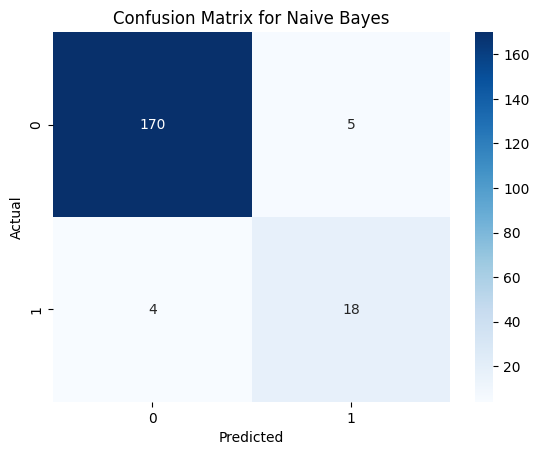

Decision Tree Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       175
           1       0.92      0.50      0.65        22

    accuracy                           0.94       197
   macro avg       0.93      0.75      0.81       197
weighted avg       0.94      0.94      0.93       197



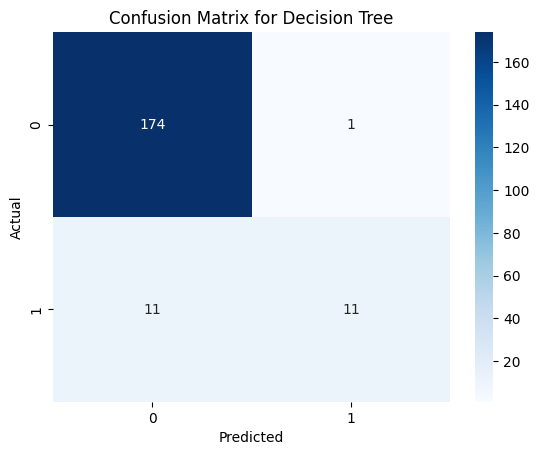

In [28]:
# Evaluate Naive Bayes
evaluate_model(y_test, y_pred_nb, 'Naive Bayes')

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, 'Decision Tree')

#####**Comparing Accuracy**

In [34]:
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")

Naive Bayes Accuracy: 0.95
Decision Tree Accuracy: 0.94
